In [75]:
import numpy as np
import pandas as pd

In [76]:
# Set seed for reproducibility
np.random.seed(5)

# Read the poem data 
poems2_df = pd.read_csv('preprocessed.csv')

print("Number of poems loaded: %s " % (len(poems2_df)))
poems2_df = poems2_df.drop_duplicates(subset='poem name', keep="last")
# Display the data
poems2_df.head()

Number of poems loaded: 508 


,ID,author,content,poem name,age,type,ori_content,con
0,1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,sir charles chamber coming writing fairy queen...,An Epilogue to the Above,Renaissance,Mythology & Folklore,"Sir Charles into my chamber coming in,\nWhen I...",sir charles chamber coming writing fairy queen...
1,2,THOMAS BASTARD,vice runs beyond old men saw far authentically...,"Book 7, Epigram 42",Renaissance,Mythology & Folklore,"Our vice runs beyond all that old men saw,\nAn...",vice run beyond old men saw far authentically ...
2,3,EDMUND SPENSER,lo man whose muse make time taught lowly sheph...,"from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore,"Lo I the man, whose Muse whilome did maske,\nA...",lo man whose muse make time taught lowly sheph...
3,8,JOHN DONNE,thy scorn undress dead thou thinks thee free s...,The Apparition,Renaissance,Mythology & Folklore,"When by thy scorn, O murd'ress, I am dead\n ...",thy scorn undress dead thou think thee free so...
4,9,JOHN SKELTON,plan ce di le xi dame artery wherefore sole ph...,The Book of Phillip Sparrow,Renaissance,Mythology & Folklore,"Pla ce bo,\nWho is there, who?\nDi le xi,\nDam...",plan ce di le xi dame artery wherefore sole ph...


In [77]:
from sklearn.cluster import MiniBatchKMeans, KMeans , AgglomerativeClustering, MeanShift
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [78]:
from nltk.stem.snowball import SnowballStemmer

# Create an English language SnowballStemmer object
stemmer = SnowballStemmer("english")
def tokenize_and_stem(text):
    
    # Tokenize by sentence, then by word
    tokens = [j for i in nltk.sent_tokenize(text) for j in nltk.word_tokenize(i)]
    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    
    # Stem the filtered_tokens
    stems = [stemmer.stem(word) for word in filtered_tokens]
    
    return stems

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Instantiate TfidfVectorizer object with stopwords and tokenizer
# parameters for efficient processing of text
#tfidf_vectorizer 
vec= TfidfVectorizer(max_df=.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem,
                                 ngram_range=(1,3))

In [80]:
import nltk
import re
#print(len(poems2_df.con.values))
#print(poems2_df.ID.values)
#print(poems2_df['ID'])
#vec = TfidfVectorizer(stop_words="english")
vec.fit(poems2_df.con.values)
features = vec.transform(poems2_df.con.values)

C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'ther

In [81]:
cls1 = MiniBatchKMeans(n_clusters=50)
cls1.fit(features)
cls2 = MiniBatchKMeans(n_clusters=10)
cls2.fit(features)
cls3 = MiniBatchKMeans(n_clusters=100)
cls3.fit(features)
cls4 = KMeans(n_clusters=50)
cls4.fit(features)
cls5 = KMeans(n_clusters=10)
cls5.fit(features)
cls6 = KMeans(n_clusters=100)
cls6.fit(features)

KMeans(n_clusters=100)

In [82]:
# predict cluster labels for new dataset
cls1.predict(features)
cls2.predict(features)
cls3.predict(features)
cls4.predict(features)
cls5.predict(features)
cls6.predict(features)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls1.labels_
cls2.labels_
cls3.labels_
cls4.labels_
cls5.labels_
cls6.labels_

#poems2_df['cluster']=cls3.labels_

array([24, 31, 51, 74, 91, 62, 59, 18,  2,  2,  2, 16, 13,  9, 31, 68, 18,
       17, 34, 71, 32, 41, 29,  2, 33, 12, 17, 56, 74,  5, 56, 31, 91, 62,
       35, 56, 92,  2, 60, 79, 17, 14, 80, 76, 31,  8, 61, 16, 39, 21, 28,
        2, 87, 45, 18, 70, 16, 43, 12, 41, 11, 64,  6, 49, 68, 29, 65, 29,
       93, 44, 87, 29, 26, 68, 71, 91, 97,  0, 76, 18, 58,  1,  2, 69,  1,
       14, 71, 46, 80, 29, 54, 44, 20, 16, 94, 99, 71, 89, 49, 48, 80, 10,
       58,  3, 47, 57, 16, 25, 41, 41, 74, 12, 11,  3, 11, 73, 14, 32, 88,
       33, 84,  1, 58, 29, 32,  0, 53, 11, 73,  1, 87, 22, 25, 47,  1, 64,
       98, 72, 41, 10, 52, 51, 20, 17, 79, 53,  2, 20, 49, 14, 31, 41, 59,
       61, 41, 11, 13, 22, 13, 39, 31, 33,  5, 80, 41, 14, 11, 98, 96, 89,
       67,  1, 49,  3, 33, 35, 11, 90,  1,  3, 78, 29, 11, 38, 78, 73, 38,
        8, 17, 11, 23, 13, 67, 51, 98, 28, 75, 23, 83, 11, 16, 41, 82, 46,
       61, 70, 16, 38,  2, 48, 63, 11, 88, 25, 49, 40, 70, 72, 43, 10, 41,
       31, 39, 11, 34, 25

In [83]:
# reduce the features to 2D
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls1.cluster_centers_)
reduced_cluster_centers = pca.transform(cls2.cluster_centers_)
reduced_cluster_centers = pca.transform(cls3.cluster_centers_)
reduced_cluster_centers = pca.transform(cls4.cluster_centers_)
reduced_cluster_centers = pca.transform(cls5.cluster_centers_)
reduced_cluster_centers = pca.transform(cls6.cluster_centers_)

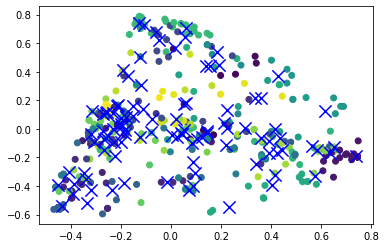

In [84]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls1.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

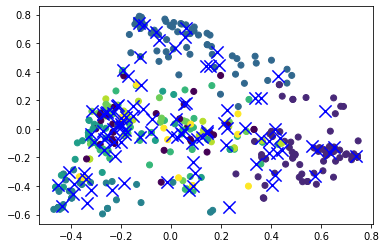

In [85]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls2.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

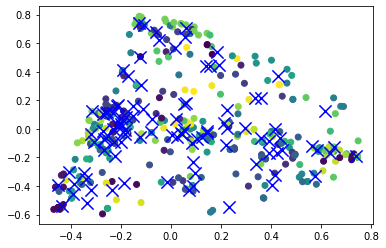

In [86]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls3.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

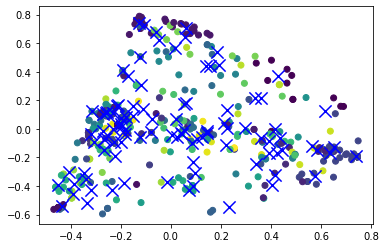

In [87]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls4.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

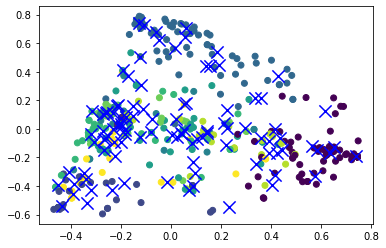

In [88]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls5.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

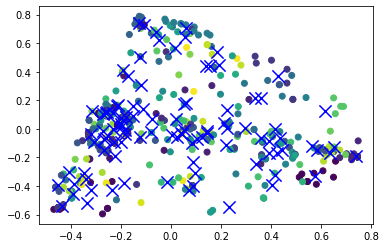

In [89]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls6.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [90]:
#######################################################################

In [91]:
from sklearn.metrics import silhouette_score
print('MiniBatchKMeans')
print(silhouette_score(features, labels=cls1.predict(features)))
print(silhouette_score(features, labels=cls2.predict(features)))
print(silhouette_score(features, labels=cls3.predict(features)))
print('KMeans')
print(silhouette_score(features, labels=cls4.predict(features)))
print(silhouette_score(features, labels=cls5.predict(features)))
print(silhouette_score(features, labels=cls6.predict(features)))

MiniBatchKMeans
0.4618064045048551
0.43154119337079266
0.4623749038908733
KMeans
0.46512187907142727
0.4453900986338554
0.4914101734683232


In [92]:
poems2_df['cluster_Mini']=cls3.labels_
poems2_df['cluster_KMeans']=cls6.labels_
poems2_df.head()

,ID,author,content,poem name,age,type,ori_content,con,cluster_Mini,cluster_KMeans
0,1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,sir charles chamber coming writing fairy queen...,An Epilogue to the Above,Renaissance,Mythology & Folklore,"Sir Charles into my chamber coming in,\nWhen I...",sir charles chamber coming writing fairy queen...,6,24
1,2,THOMAS BASTARD,vice runs beyond old men saw far authentically...,"Book 7, Epigram 42",Renaissance,Mythology & Folklore,"Our vice runs beyond all that old men saw,\nAn...",vice run beyond old men saw far authentically ...,78,31
2,3,EDMUND SPENSER,lo man whose muse make time taught lowly sheph...,"from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore,"Lo I the man, whose Muse whilome did maske,\nA...",lo man whose muse make time taught lowly sheph...,25,51
3,8,JOHN DONNE,thy scorn undress dead thou thinks thee free s...,The Apparition,Renaissance,Mythology & Folklore,"When by thy scorn, O murd'ress, I am dead\n ...",thy scorn undress dead thou think thee free so...,19,74
4,9,JOHN SKELTON,plan ce di le xi dame artery wherefore sole ph...,The Book of Phillip Sparrow,Renaissance,Mythology & Folklore,"Pla ce bo,\nWho is there, who?\nDi le xi,\nDam...",plan ce di le xi dame artery wherefore sole ph...,79,91


In [93]:
poems2_df.to_csv('poem_cluster_2.csv')